# HAT-P-1

**Note**: HAT-P-1 has a very nearby companion on the detector, which in this case will break some of the `ombre` assumptions if we don't mask it first. In this notebook we first calculate the spectrum for the target, but we also calculate the spectrum for the (brighter) companion star so we can use it as a comparison.

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import lightkurve as lk
from glob import glob
import ombre as om
import astropy.units as u
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [21]:
name = 'HAT-P-1'

## HAT-P-1

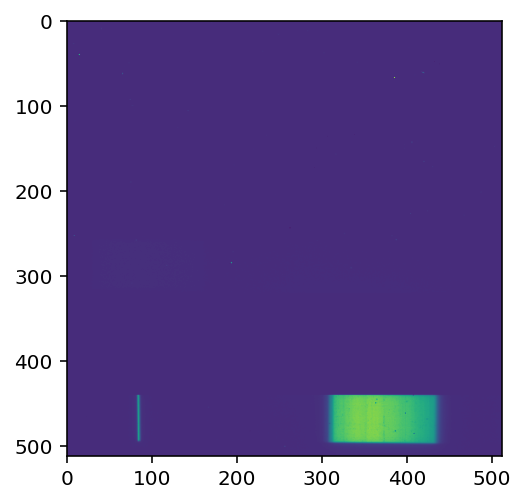

In [22]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))
pixel_mask = np.ones((512, 512))
pixel_mask[320:440] = 0
plt.imshow(fits.open(fnames[100])[1].data * pixel_mask)

In [62]:
obs = om.Observation.from_files(fnames, pixel_mask=pixel_mask)

/Users/ch/HST/projects/ombre/src/ombre/visit.py:210: RuntimeWarning: divide by zero encountered in true_divide
  larger_mask = convolve(self.mask[0], Box2DKernel(31)) > 1e-5


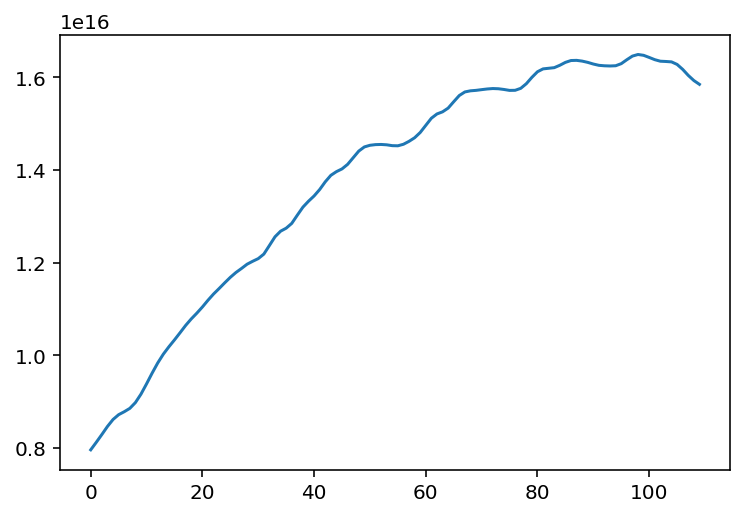

In [63]:
plt.plot(obs[0].sensitivity_raw)

In [67]:
import astropy.units as u

In [72]:
u.Angstrom

Unit("Angstrom")

In [84]:
spec = (average_spectrum(obs[0])/obs[0].sensitivity_raw)/4 * np.pi * (obs.dist*u.parsec)**2

NameError: name 'avg' is not defined

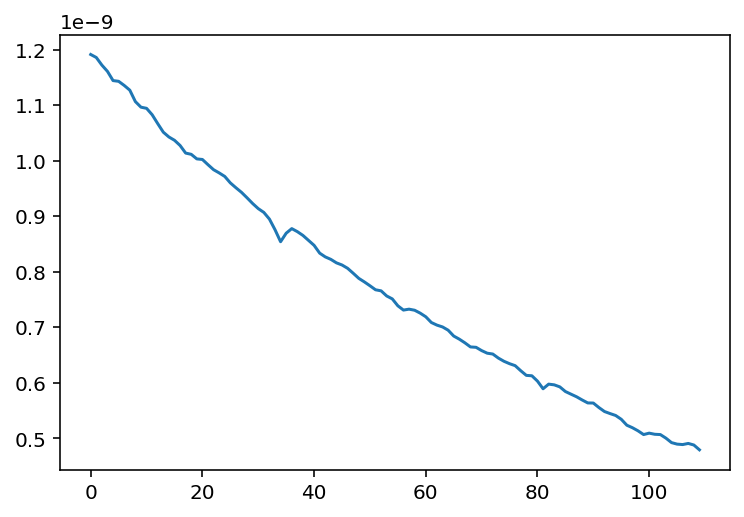

In [86]:
plt.plot(spec)

(111, 512, 512)

In [242]:
def total_spectrum(self):
    avg = np.atleast_3d(self.average_vsr)
    oot = self.oot
    spec_mean = np.average(self.data[oot]/avg, axis=0, weights=self.error[oot]/avg)
    e = np.average(self.data[oot]/avg - spec_mean, axis=0, weights=self.error[oot]/avg)
    plt.errorbar(np.arange(len(spec_mean.ravel())), spec_mean.ravel(), e.ravel())
    spec_mean = spec_mean.sum(axis=0) * u.electron
    e = (e ** 2).sum(axis=0)**0.5
    e *= u.electron
    spec_mean /= (self.exptime * u.second)
    spec_mean *= 1/u.Angstrom
    e /= (self.exptime * u.second)
    e *= 1/u.Angstrom
    #spec_mean /= np.mean(spec_mean)
    return spec_mean/(self.sensitivity_raw), e/self.sensitivity_raw

(<Quantity [7.32539472e-14, 7.29208614e-14, 7.20780596e-14, 7.13819120e-14,
            7.03643943e-14, 7.02826430e-14, 6.98232529e-14, 6.93006187e-14,
            6.80339569e-14, 6.74173579e-14, 6.72897531e-14, 6.65828108e-14,
            6.55964678e-14, 6.46490597e-14, 6.41179159e-14, 6.37532177e-14,
            6.31788690e-14, 6.23350216e-14, 6.21969225e-14, 6.16911525e-14,
            6.16268224e-14, 6.10478907e-14, 6.04948231e-14, 6.01402351e-14,
            5.97491315e-14, 5.90350822e-14, 5.84963066e-14, 5.79886831e-14,
            5.73792343e-14, 5.67480916e-14, 5.61855330e-14, 5.57644549e-14,
            5.50276141e-14, 5.38536771e-14, 5.25197806e-14, 5.34617787e-14,
            5.39717439e-14, 5.36359411e-14, 5.32167859e-14, 5.26698796e-14,
            5.21181421e-14, 5.12549087e-14, 5.08392445e-14, 5.05651336e-14,
            5.01804656e-14, 4.99424031e-14, 4.95761105e-14, 4.90312753e-14,
            4.84636186e-14, 4.80699754e-14, 4.76448200e-14, 4.72010898e-14,
            

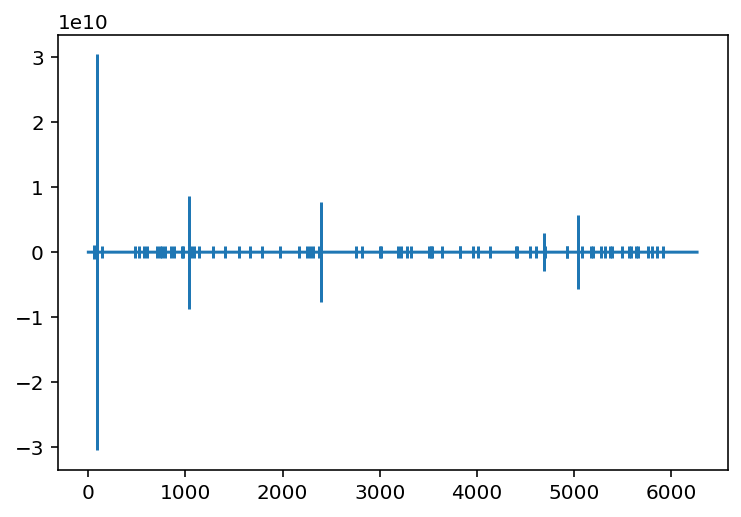

In [243]:
total_spectrum(obs[0])

In [234]:
%debug

> /Users/ch/Library/Caches/pypoetry/virtualenvs/ombre-vf38qw1p-py3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py(3452)extract_err()
   3450             for e in [a, b]:
   3451                 if len(data) != len(e):
-> 3452                     raise ValueError(
   3453                         f"The lengths of the data ({len(data)}) and the "
   3454                         f"error {len(e)} do not match")



ipdb>  u


> /Users/ch/Library/Caches/pypoetry/virtualenvs/ombre-vf38qw1p-py3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py(3495)errorbar()
   3493 
   3494         if yerr is not None:
-> 3495             lower, upper = extract_err('y', yerr, y, lolims, uplims)
   3496             barcols.append(self.vlines(
   3497                 *apply_mask([x, lower, upper], everymask), **eb_lines_style))



ipdb>  u


> /Users/ch/Library/Caches/pypoetry/virtualenvs/ombre-vf38qw1p-py3.8/lib/python3.8/site-packages/matplotlib/__init__.py(1361)inner()
   1359     def inner(ax, *args, data=None, **kwargs):
   1360         if data is None:
-> 1361             return func(ax, *map(sanitize_sequence, args), **kwargs)
   1362 
   1363         bound = new_sig.bind(ax, *args, **kwargs)



ipdb>  u


> /Users/ch/Library/Caches/pypoetry/virtualenvs/ombre-vf38qw1p-py3.8/lib/python3.8/site-packages/matplotlib/pyplot.py(2772)errorbar()
   2770         uplims=False, xlolims=False, xuplims=False, errorevery=1,
   2771         capthick=None, *, data=None, **kwargs):
-> 2772     return gca().errorbar(
   2773         x, y, yerr=yerr, xerr=xerr, fmt=fmt, ecolor=ecolor,
   2774         elinewidth=elinewidth, capsize=capsize, barsabove=barsabove,



ipdb>  u


> /var/folders/yn/f2r51bxd7pj58243x2y_c6340000gn/T/ipykernel_78725/2783970916.py(6)total_spectrum()
      4     spec_mean = (self.data[oot]/np.atleast_3d(self.average_vsr[oot])).mean(axis=0).sum(axis=0) * u.electron
      5     e = ((self.error[oot]/np.atleast_3d(self.average_vsr[oot]))**2).sum(axis=0)**0.5/(oot.sum())
----> 6     plt.errorbar(np.arange(len(spec_mean.ravel())), spec_mean.ravel(), e.ravel())
      7     e = (e ** 2).sum(axis=0)**0.5
      8     e *= u.electron



ipdb>  u


> /var/folders/yn/f2r51bxd7pj58243x2y_c6340000gn/T/ipykernel_78725/1738796562.py(1)<module>()
----> 1 total_spectrum(obs[0])



ipdb>  d


> /var/folders/yn/f2r51bxd7pj58243x2y_c6340000gn/T/ipykernel_78725/2783970916.py(6)total_spectrum()
      4     spec_mean = (self.data[oot]/np.atleast_3d(self.average_vsr[oot])).mean(axis=0).sum(axis=0) * u.electron
      5     e = ((self.error[oot]/np.atleast_3d(self.average_vsr[oot]))**2).sum(axis=0)**0.5/(oot.sum())
----> 6     plt.errorbar(np.arange(len(spec_mean.ravel())), spec_mean.ravel(), e.ravel())
      7     e = (e ** 2).sum(axis=0)**0.5
      8     e *= u.electron



ipdb>  e.shape


(57, 110)


ipdb>  spec_mean.shape


(110,)


ipdb>  q


In [218]:
self = obs[0]

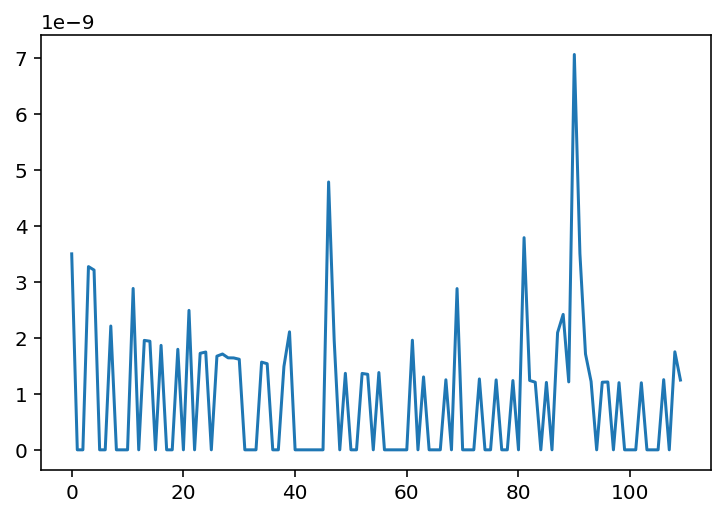

In [219]:
plt.plot(total_spectrum(obs[0])[1].value)

In [ ]:
spec_mean = (self.error[oot]/np.atleast_3d(self.average_vsr[oot])).sum(axis=0)**2.sum(axis=0) * u.electron

In [196]:
average_spectrum(obs[0])

<Quantity [7.32502696e-14, 7.29171231e-14, 7.20746132e-14, 7.13784088e-14,
           7.03612869e-14, 7.02792028e-14, 6.98206676e-14, 6.92980639e-14,
           6.80311206e-14, 6.74150771e-14, 6.72875429e-14, 6.65806057e-14,
           6.55942401e-14, 6.46466873e-14, 6.41157199e-14, 6.37508030e-14,
           6.31763322e-14, 6.23328358e-14, 6.21946561e-14, 6.16891074e-14,
           6.16243286e-14, 6.10459152e-14, 6.04926863e-14, 6.01382848e-14,
           5.97471580e-14, 5.90329135e-14, 5.84943593e-14, 5.79864382e-14,
           5.73770411e-14, 5.67460344e-14, 5.61835802e-14, 5.57625271e-14,
           5.50256782e-14, 5.38514985e-14, 5.25179721e-14, 5.34602321e-14,
           5.39700082e-14, 5.36342217e-14, 5.32150931e-14, 5.26672175e-14,
           5.21163347e-14, 5.12531769e-14, 5.08376582e-14, 5.05634567e-14,
           5.01787895e-14, 4.99407960e-14, 4.95745840e-14, 4.90297242e-14,
           4.84620603e-14, 4.80683907e-14, 4.76432066e-14, 4.71986357e-14,
           4.70792400e-14

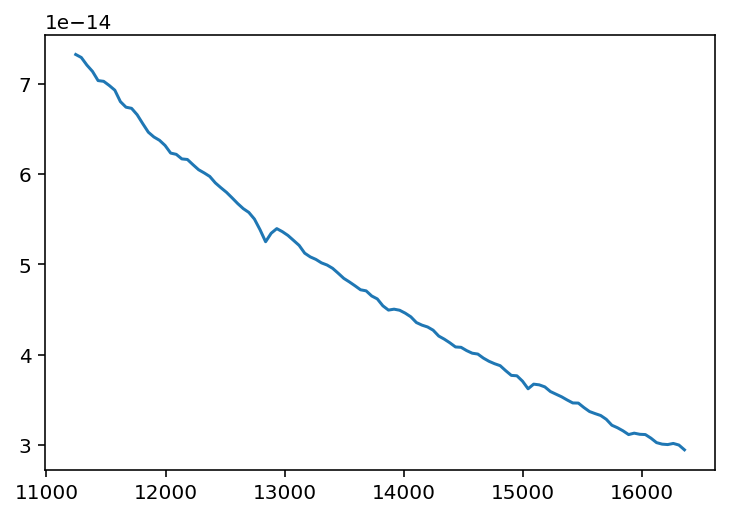

In [194]:
plt.plot(obs[0].wavelength*u.Angstrom, average_spectrum(obs[0]))

In [154]:
flux = (average_spectrum(obs[0])/(4 * np.pi * (obs[0].dist * u.parsec)**2))

In [54]:
obs[0].sensitivity

array([0.60703869, 0.61946274, 0.63231156, 0.64554621, 0.6570024 ,
       0.66490138, 0.66975624, 0.67528885, 0.68479469, 0.69872442,
       0.71567332, 0.73336564, 0.75005349, 0.76451388, 0.77670969,
       0.78803339, 0.7998454 , 0.81186572, 0.82253309, 0.83202016,
       0.84222665, 0.85331856, 0.8635958 , 0.8726695 , 0.88203191,
       0.89103507, 0.89895857, 0.90560464, 0.91262191, 0.91743454,
       0.9218368 , 0.92926807, 0.94344995, 0.9577782 , 0.96698398,
       0.97193104, 0.9798447 , 0.99340922, 1.00659078, 1.01634122,
       1.02501173, 1.03558144, 1.04829979, 1.05894016, 1.06503564,
       1.06953507, 1.07699157, 1.08794046, 1.09886766, 1.10569748,
       1.10840107, 1.10950195, 1.10976809, 1.10918269, 1.10779387,
       1.10756464, 1.11009035, 1.1149173 , 1.1208022 , 1.12946959,
       1.14123913, 1.1529538 , 1.15997835, 1.16347956, 1.16959832,
       1.18012902, 1.19034888, 1.19622217, 1.19808418, 1.19882889,
       1.20000673, 1.20111165, 1.20181475, 1.20147154, 1.20029

In [39]:
average_spectrum(obs[0])

array([477.670432  , 485.22925767, 489.57251925, 494.99185138,
       496.59960698, 501.98185237, 502.35344109, 502.71203479,
       500.46619408, 506.02604287, 517.32078643, 524.54004773,
       528.52753982, 530.93351248, 534.97416092, 539.68270458,
       542.83474376, 543.63864112, 549.56001416, 551.38200772,
       557.55566038, 559.60130244, 561.20627765, 563.78197567,
       566.12386147, 565.06399629, 564.88987455, 564.12151629,
       562.5186002 , 559.26725193, 556.38195321, 556.66358224,
       557.69073645, 554.07651097, 545.55234827, 558.18460905,
       568.0939917 , 572.37495381, 575.43806079, 575.02065592,
       573.86817965, 570.18378265, 572.50838649, 575.199031  ,
       574.10860849, 573.80049747, 573.56471752, 573.02704866,
       572.0812544 , 570.96077415, 567.2934111 , 562.54946057,
       561.26541222, 554.2085649 , 549.65724982, 540.42893582,
       536.03607095, 539.58005433, 540.99876967, 541.27983444,
       541.97582693, 539.66852837, 539.36849947, 538.47

In [28]:
obs[0].average_spectrum

(111, 57, 110)

In [6]:
clc = lk.search_lightcurve(name, author='QLP').download_all().stitch().remove_nans().flatten(201)
clc.flux = clc.flux.value * u.electron/u.s
clc.flux_err = clc.flux_err.value * u.electron/u.s

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

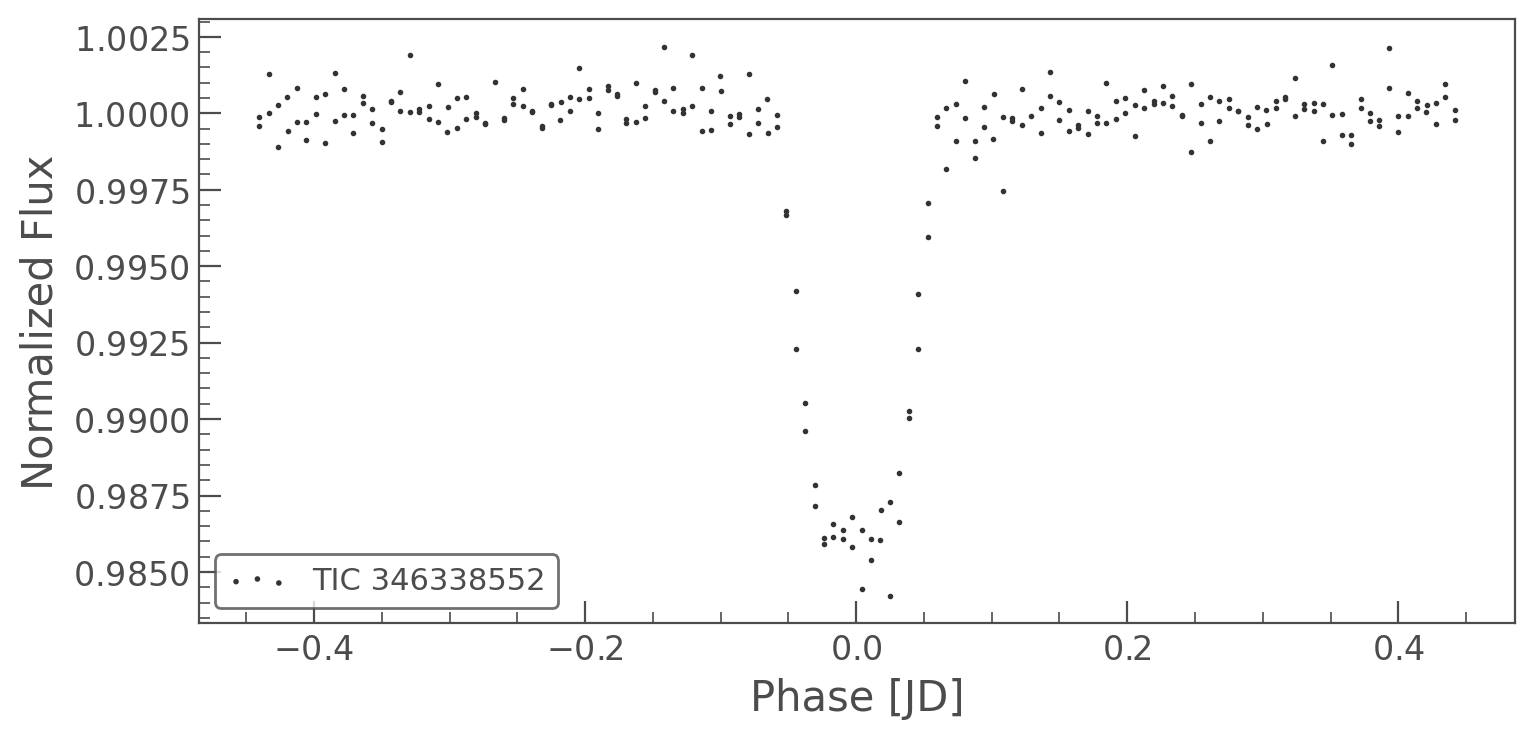

In [7]:
k = np.abs(((clc.time.value - (obs.t0 - 2457000 + obs.period/2))/obs.period) % 1 - 0.5) < 0.1
clc[k].fold(obs.period, obs.t0 - 2457000).scatter()

In [8]:
obs.fit_transit(x_suppl=clc.time.value + 2457000,
                y_suppl=clc.flux.value/np.median(clc.flux.value),
                yerr_suppl=clc.flux_err.value/np.median(clc.flux.value),
                exptime_suppl=np.median(np.diff(clc.time.value)), fit_t0=True, fit_period=True, fit_inc=True)

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

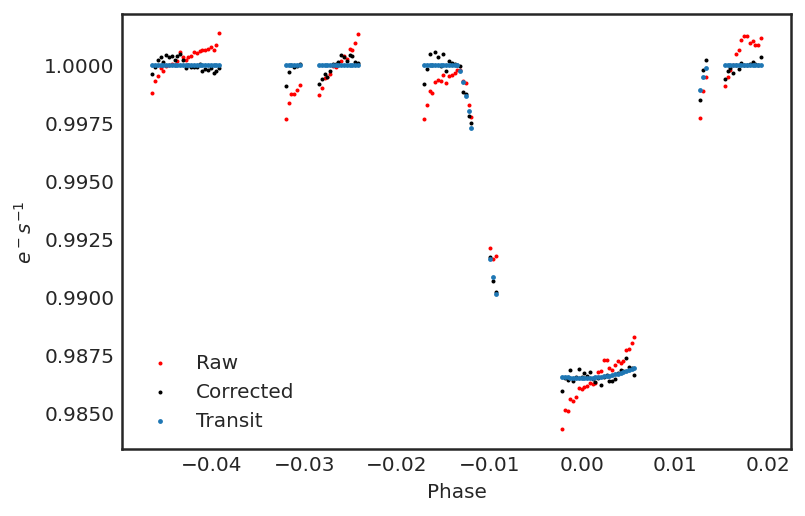

In [9]:
obs.plot()

In [10]:
obs.fit_model()

Fitting Transit/Eclipse Model: 100%|██████████████| 1/1 [00:19<00:00, 19.31s/it]


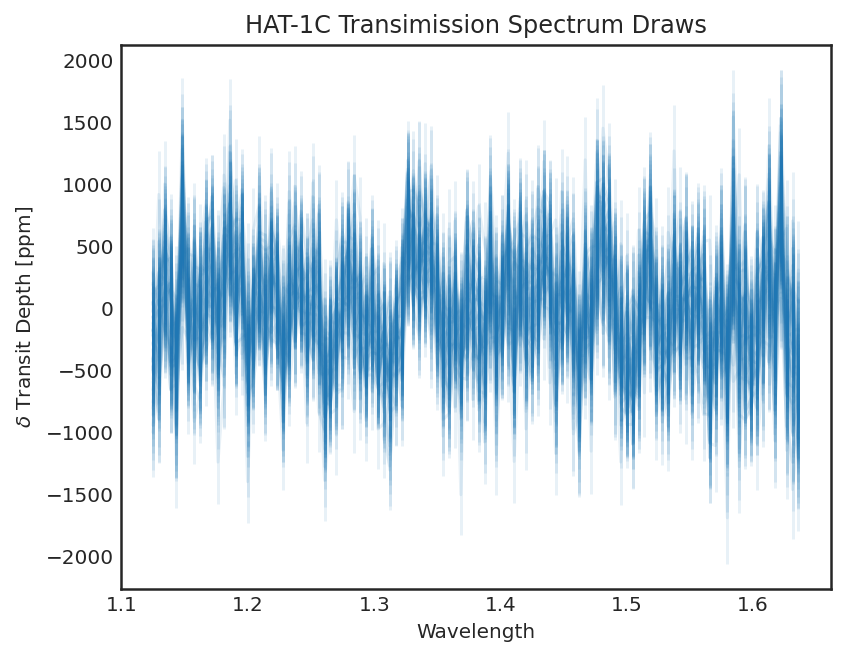

In [11]:
obs.plot_spectra()

<AxesSubplot:title={'center':'HAT-1C Transmission Spectrum, Visit: 1'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

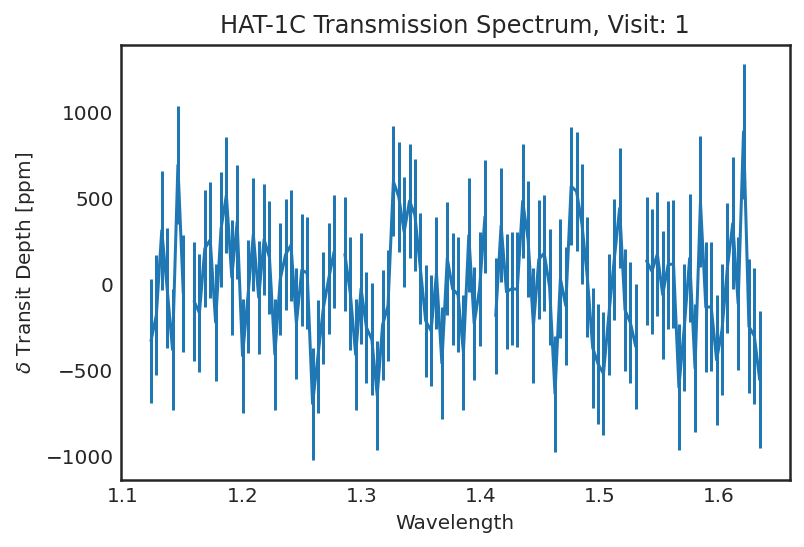

In [12]:
om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 200)).plot()

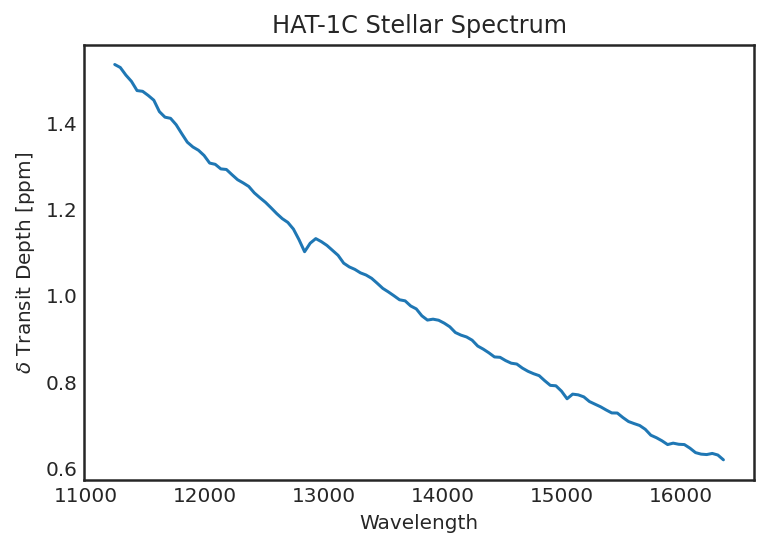

In [13]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [14]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits', overwrite=True)
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits', overwrite=True)
except:
    pass

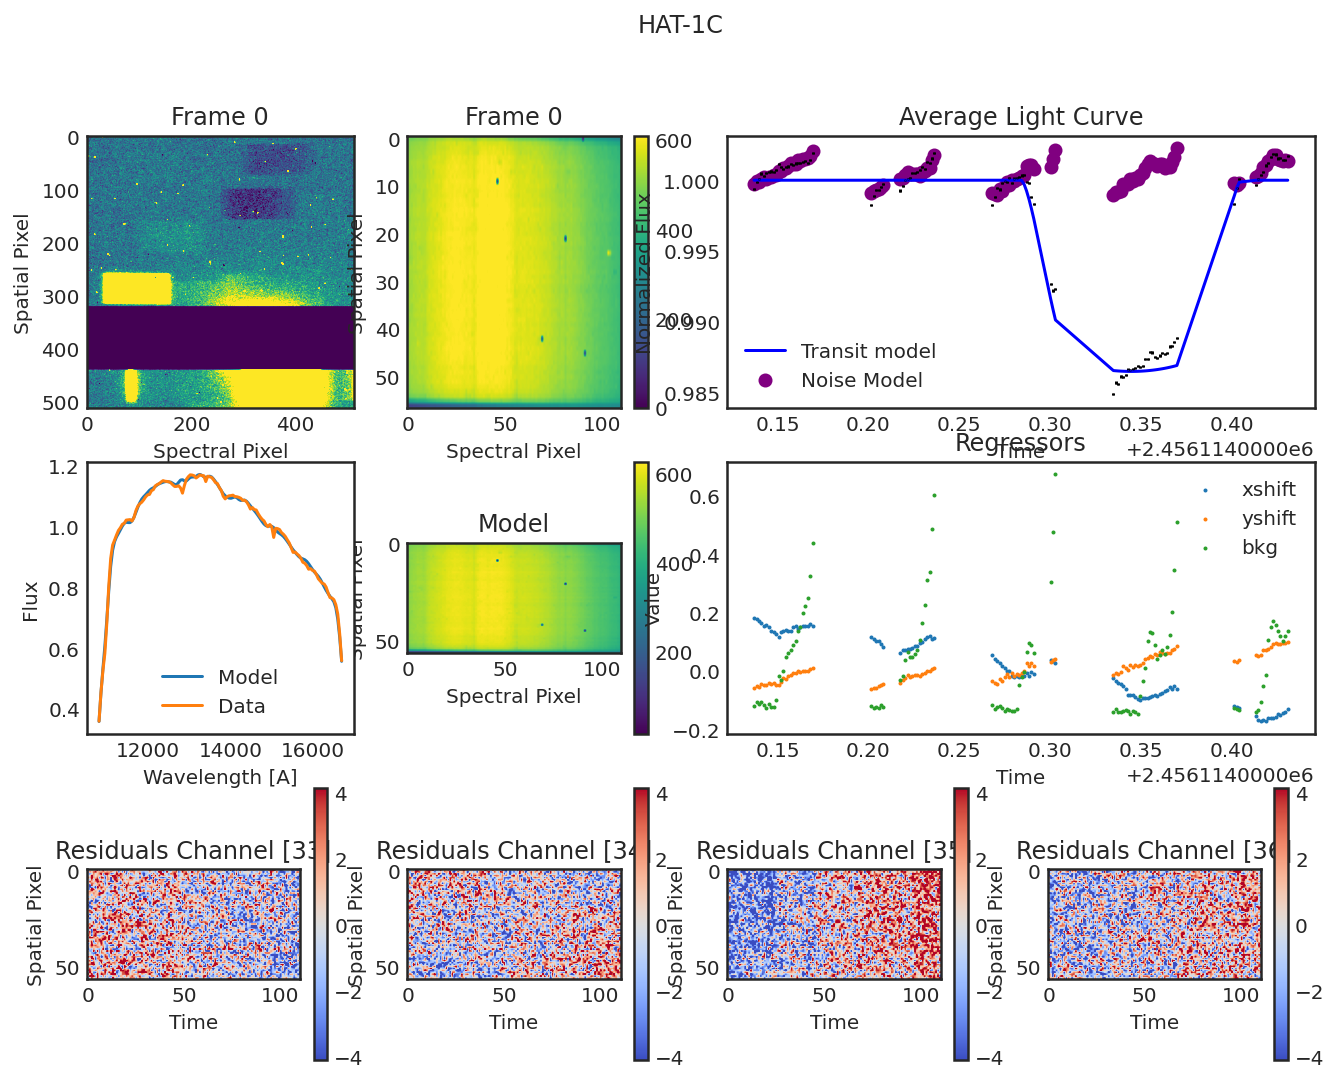

In [16]:
for visit in obs:
    visit.diagnose();
    plt.show();

## Companion

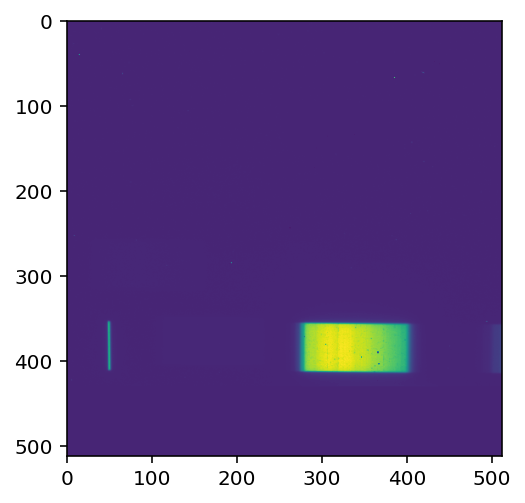

In [98]:
pixel_mask = np.ones((512, 512))
pixel_mask[430:] = 0
plt.imshow(fits.open(fnames[100])[1].data * pixel_mask)

In [99]:
obs2 = om.Observation.from_files(fnames, pixel_mask=pixel_mask)

/Users/ch/HST/projects/ombre/src/ombre/visit.py:208: RuntimeWarning: divide by zero encountered in true_divide
  w[self.err / self.sci > 0.1] = 1e10


In [100]:
obs2.copy_transit_fit(obs)

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

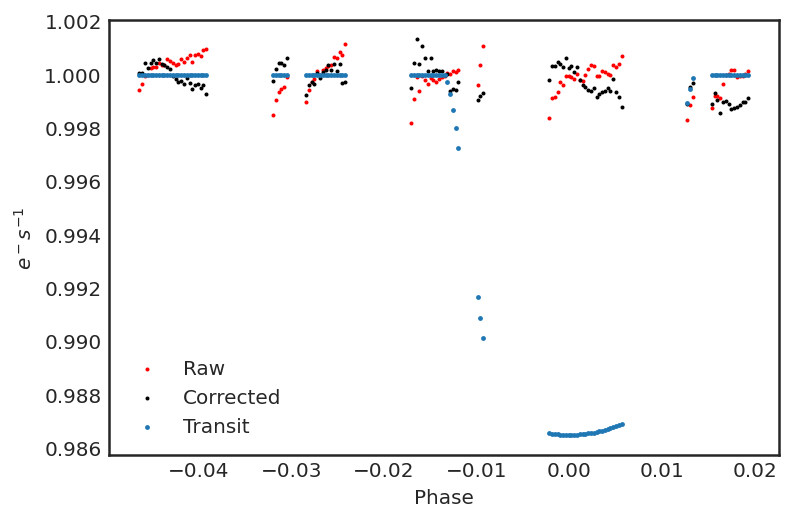

In [101]:
obs2.plot()

In [102]:
obs2.fit_model()


Fitting Transit/Eclipse Model: 100%|██████████████| 1/1 [00:14<00:00, 14.10s/it]


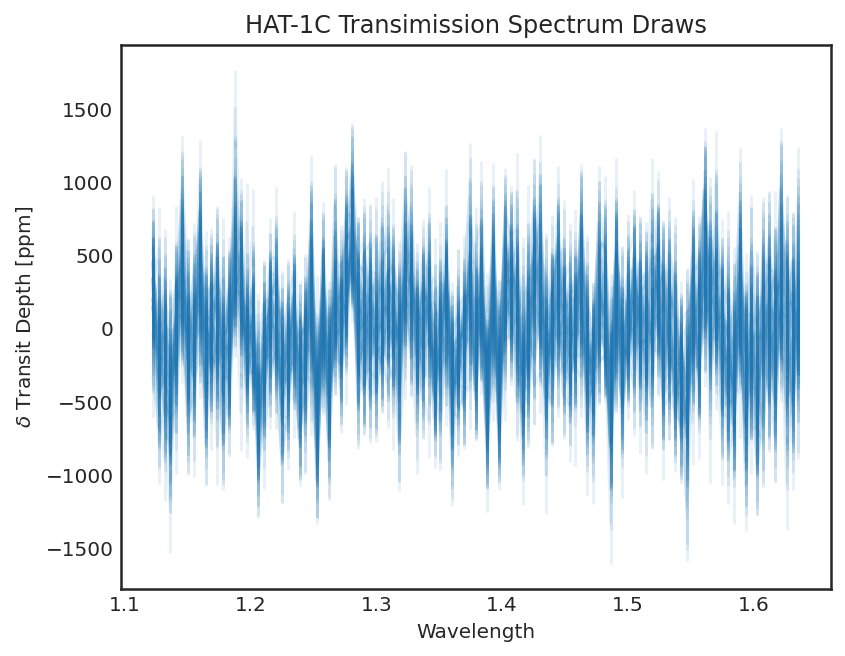

In [103]:
obs2.plot_spectra()

<AxesSubplot:title={'center':'HAT-1C Transmission Spectrum, Visit: 1'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

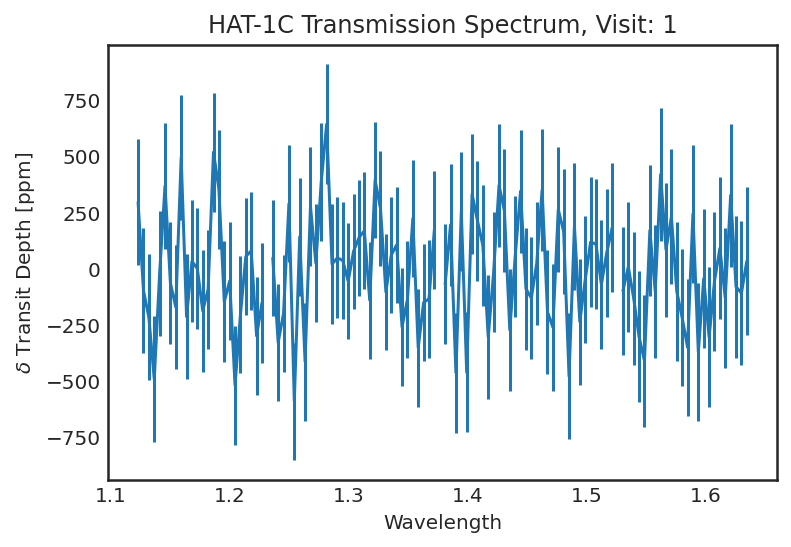

In [104]:
om.Spectra([visit.transmission_spectrum for visit in obs2]).flatten().bin(bins=np.linspace(0.8, 1.7, 200)).plot()

In [ ]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/noplanets/{name}_transmission.fits', overwrite=True)
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/noplanets/{name}_emission.fits', overwrite=True)
except:
    pass

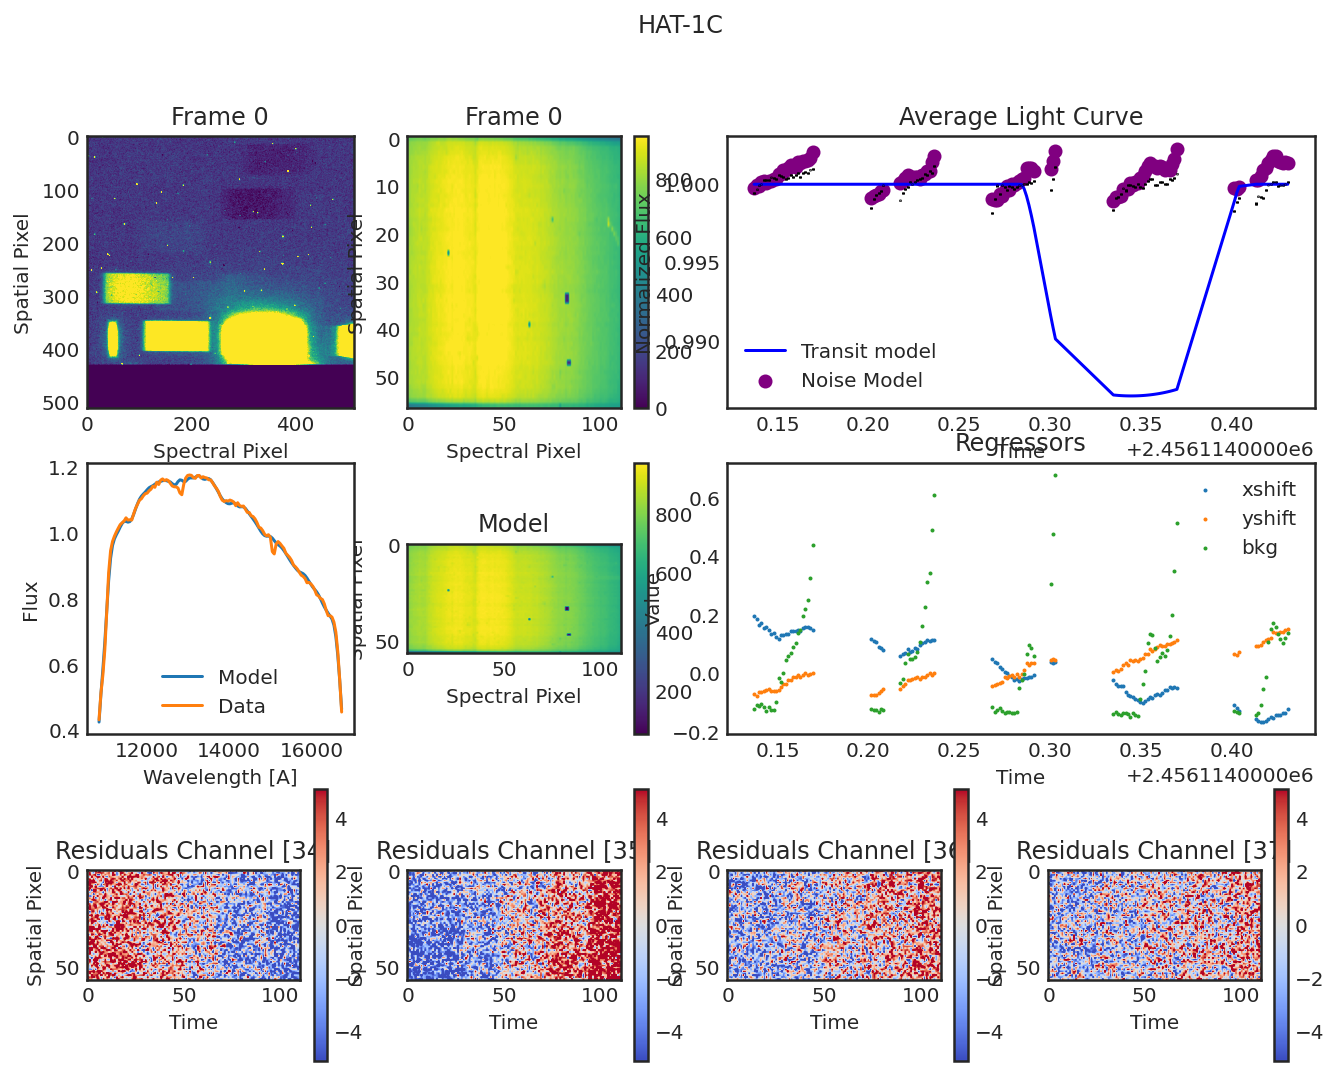

In [105]:
for visit in obs2:
    visit.diagnose();
    plt.show();